In [13]:
#biblioteki:
import matplotlib.pyplot as plt
import numpy as np
import sys
import math as m
import random

Dyski:

In [2]:
def machine_numbers(base, bit_count, mantys_count):
    number_list = []
    for sgn in [1,2]:
        for exp in range(0, base**(bit_count- mantys_count- 1)):
            for mantys in range(0, base**mantys_count):
                machine_number = ((-1)**sgn)*(1+mantys/base**mantys_count)*(base**exp)
                number_list.append(machine_number)
    return number_list

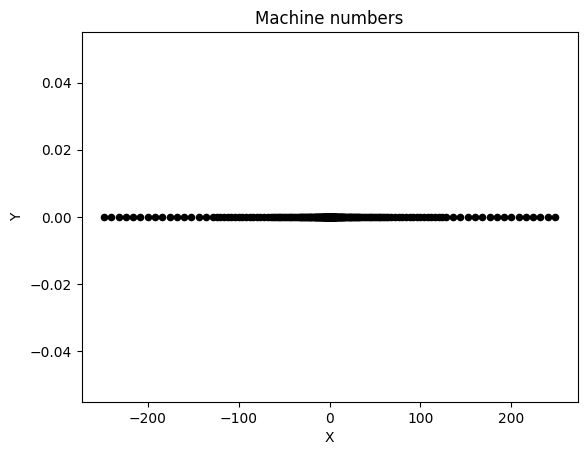

In [3]:
wynik = machine_numbers(2,8,4)
plt.scatter(x= wynik,y= np.zeros_like(wynik), s = 20 , c = 'black')
plt.title("Machine numbers")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Rozkład LU:

In [ ]:
def LUdecomposition(A):
    n=A.shape[0]
    L = np.eye(n)
    print(A)
    U = A.copy().astype(float)
    for s in range(n-1):
        for j in range(s+1,n):
            coff = U[j,s]/U[s,s]
            U[j] = U[j] - (coff)*U[s] 
            L[j,s] = coff
    return f'{U} \n  {L} \n {L@U == A}'  

In [5]:
print(LUdecomposition(np.random.randint(-10,11, size=(4,4))))

[[  3   0   9   4]
 [  3   7   3  -6]
 [  5  -5   7 -10]
 [ -2  -2  -9  -8]]
[[  3.           0.           9.           4.        ]
 [  0.           7.          -6.         -10.        ]
 [  0.           0.         -12.28571429 -23.80952381]
 [  0.           0.           0.           0.94573643]] 
  [[ 1.          0.          0.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 1.66666667 -0.71428571  1.          0.        ]
 [-0.66666667 -0.28571429  0.38372093  1.        ]] 
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True False]]


Dyski Gerszgorina:

In [6]:
def dysk_garszgorina(macierz):
    n = macierz.shape[0]
    
    global c_s , r_s
    
    c_s = [int(macierz[i,i]) for i in range(n)]
    
    r_s = [int(sum(abs(macierz[j,k]) for k in range(n) if k != j)) for j in range(n)]
    
    return [f'promien_{i+1} : {r_s[i]} <<<dysk_{i+1}>>> środek_{i+1} : {c_s[i]}' for i in range(n)]

def vizual_dg(list_c,list_r):
    
    fig, ax = plt.subplots()
    
    for i in range(len(list_c)):
        
        circle = plt.Circle((list_c[i], 0), list_r[i], color='blue', fill=False, linestyle='-')
        
        ax.add_artist(circle)
    
    ax.set_xlim(-10*len(list_c), 10*len(list_c))
    
    ax.set_ylim(-10*len(list_c), 10*len(list_c)) 
    
    ax.axhline(0, color='black', linewidth=1)
    
    ax.grid(True, linestyle='--', alpha=0.6)
    
    ax.axvline(0, color='black', linewidth=1)
    
    ax.set_aspect('equal', adjustable = 'box')  
    
    ax.set_title(f'dyski garszgorina dla losowej macierzy {len(list_c)} x {len(list_c)}')
    
    return plt.show()

['promien_1 : 41 <<<dysk_1>>> środek_1 : -4', 'promien_2 : 65 <<<dysk_2>>> środek_2 : 7', 'promien_3 : 40 <<<dysk_3>>> środek_3 : -7', 'promien_4 : 47 <<<dysk_4>>> środek_4 : 8', 'promien_5 : 50 <<<dysk_5>>> środek_5 : -2', 'promien_6 : 38 <<<dysk_6>>> środek_6 : 9', 'promien_7 : 49 <<<dysk_7>>> środek_7 : -6', 'promien_8 : 30 <<<dysk_8>>> środek_8 : 4', 'promien_9 : 49 <<<dysk_9>>> środek_9 : -5', 'promien_10 : 47 <<<dysk_10>>> środek_10 : -4']


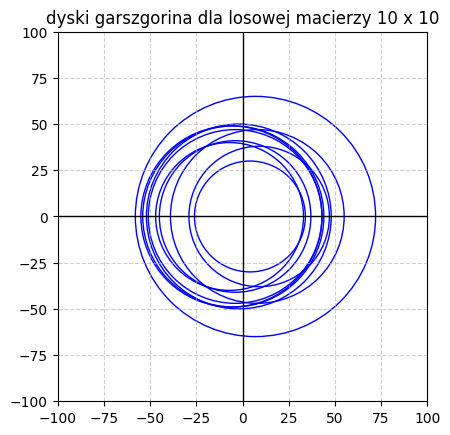

In [7]:
a = dysk_garszgorina(np.random.randint(-10,10,(10,10)))
print(a)
vizual_dg(c_s,r_s)

Metoda Jakobiego:

In [11]:
def jacobi(A, x, b, steps = 100):

    check = (A.shape[1] == x.size and A.shape[0] == b.size)
    if not check:
        raise ValueError('podane wartosci maja niezgodne wymiary')
    
    if np.linalg.matrix_rank(A) == 0:
        raise ValueError('Macierz ma rzad 0')
    
    h = 100*sys.float_info.epsilon
    step = x
    
    a = np.diag(A)
    if np.any(np.abs(a)<h):
        raise ValueError('macierz A ma zera na przekątnej')
    
    R = A - np.diag(a)
    a = 1.0 / a
    
    for _ in range(steps):
        step = a *( b - np.dot(R,step))
        if np.linalg.norm(step-b) < h:
            break   
    return step

In [12]:
A = np.array([[10,0,1],[0,10,1],[0,1,10]])
solution = jacobi(A, np.zeros(3),np.array([1,0,0]))
print(solution)
print(A@solution - np.array([1,0,0]))

[0.1 0.  0. ]
[0. 0. 0.]


Metoda Newtona:

In [15]:
def newton_method(func, start_x, max_iter, d, precision, max_restarts = 5):
    x = start_x
    restarts = 0
    while restarts <= max_restarts:
        for it in range(max_iter):
            fx = func(x)
            dfx = (func(x+d)-func(x))/d
            if abs(dfx)<1e-10:
                print(f'utknięto w punkcie:{x:.4f}')
                x = random.uniform(-10,10)
                restarts += 1
                break
            x_new = x - fx / dfx
            if abs(x_new - x) < precision:
                return f'x = {x}, max_iter = {max_iter +1}, restarts = {restarts}'
            x = x_new
        else:
            return f'x = {x}, max_iter = {max_iter}, restarts = {restarts}'
    return None  

In [16]:
print(newton_method(lambda x : x**2 + 5*x -10, 0,100,1e-10,1e-10))

x = 1.5311288741492752, max_iter = 101, restarts = 0
